# Car Prices

🎯 The goal of this challenge is to prepare a dataset and apply some feature selection techniques that you have learned so far.

🚗 We are dealing with a dataset about cars and we would like to predict whether a car is expensive or cheap.

In [1]:
url = "https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Cars_dataset.csv"

In [2]:
import pandas as pd

df = pd.read_csv(url)
df.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,64.1,2548,dohc,four,2.68,5000,expensive
1,std,front,64.1,2548,dohc,four,2.68,5000,expensive
2,std,front,65.5,2823,ohcv,six,3.47,5000,expensive
3,std,front,NaN,2337,ohc,four,3.40,5500,expensive
4,std,front,66.4,2824,ohc,five,3.40,5500,expensive


ℹ️ The description of the dataset is available [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Cars_dataset_description.txt). Make sure to refer to it throughout the exercise.

## (1) Duplicates

❓ Remove the duplicates from the dataset if there are any. ❓

*Overwite the dataframe `df`*

In [3]:
df.drop_duplicates(inplace=True)

## (2) Missing values

❓ Find the missing values and impute them either with `strategy = "most frequent"` (categorical variables) or `strategy = "mean"` (numerical variables) ❓


In [4]:
round(df.isnull().sum().sort_values(ascending=False)/len(df),3) #NaN percentage for each column

enginelocation    0.052
carwidth          0.010
aspiration        0.000
curbweight        0.000
enginetype        0.000
cylindernumber    0.000
stroke            0.000
peakrpm           0.000
price             0.000
dtype: float64

### `carwidth`

<details>
    <summary> 💡 Hint </summary>
    <br>
    ℹ️ <code>carwidth</code> has multiple representations for missing values. Some are <code>np.nans</code>, some are  <code>*</code>. Once located, they can be imputed by the median value, since missing values make up less than 30% of the data.
</details> 

In [5]:
print(df.carwidth.unique()) # Check unique values in column

['64.1' '65.5' nan '66.4' '66.3' '71.4' '67.9' '64.8' '66.9' '70.9' '60.3'
 '*' '63.6' '63.8' '64.6' '63.9' '64' '65.2' '66' '61.8' '69.6' '70.6'
 '64.2' '65.7' '66.5' '66.1' '70.3' '71.7' '70.5' '72' '68' '64.4' '65.4'
 '68.4' '68.3' '65' '72.3' '66.6' '63.4' '65.6' '67.7' '67.2' '68.9'
 '68.8']


In [6]:
import numpy as np
from sklearn.impute import SimpleImputer

df = df.replace("*", np.nan) # Replace occurences of "*" by np.nan 

carwidth_imputer = SimpleImputer(strategy="median") # Instanciate median imputer
carwidth_imputer.fit(df[['carwidth']]) # Fit imputer to carwidth column
df['carwidth'] = carwidth_imputer.transform(df[['carwidth']]) # Impute

df.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,64.1,2548,dohc,four,2.68,5000,expensive
2,std,front,65.5,2823,ohcv,six,3.47,5000,expensive
3,std,front,65.5,2337,ohc,four,3.40,5500,expensive
4,std,front,66.4,2824,ohc,five,3.40,5500,expensive
5,std,front,66.3,2507,ohc,five,3.40,5500,expensive


### `enginelocation`

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ Considering that <code>enginelocation</code> is a categorical feature, and that the vast majority of the category is <code>front</code>, impute with the most frequent.
</details>

In [7]:
print(df.enginelocation.unique()) # Unique values

['front' nan 'rear']


In [8]:
print(df.enginelocation.value_counts()) # Count of each value

front    179
rear       2
Name: enginelocation, dtype: int64


In [9]:
engine_imputer = SimpleImputer(strategy="most_frequent")  # Instantiate most frequent imputer
engine_imputer.fit(df[['enginelocation']]) # Fit imputer to enginelocation column
df['enginelocation'] = engine_imputer.transform(df[['enginelocation']]) # Impute

df.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,64.1,2548,dohc,four,2.68,5000,expensive
2,std,front,65.5,2823,ohcv,six,3.47,5000,expensive
3,std,front,65.5,2337,ohc,four,3.40,5500,expensive
4,std,front,66.4,2824,ohc,five,3.40,5500,expensive
5,std,front,66.3,2507,ohc,five,3.40,5500,expensive


🧪 **Test your code**

In [10]:
from nbresult import ChallengeResult

result = ChallengeResult('missing_values',
                         dataset = df)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.8.10, pytest-7.1.2, pluggy-1.0.0 -- /bin/python3
cachedir: .pytest_cache
rootdir: /home/quantium/labs/lewagon/data-challenges/05-ML/02-Prepare-the-dataset/03-Car-Prices/tests
plugins: dash-1.19.0, anyio-3.6.1
collecting ... collected 2 items

test_missing_values.py::TestMissing_values::test_carwidth PASSED         [ 50%]
test_missing_values.py::TestMissing_values::test_engine_location PASSED  [100%]

============================== 2 passed in 0.39s ===============================


💯 You can commit your code:

git add tests/missing_values.pickle

git commit -m 'Completed missing_values step'

git push origin master



## (3) Scaling the numerical features

❓ **Question: Scaling the numerical features** ❓

Investigate the numerical features for outliers and distribution, and apply the solutions below accordingly:
- Robust Scaler
- Standard Scaler

Replace the original columns with the transformed values.

### `peakrpm` , `carwidth` , & `stroke`

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ <code>peakrpm</code>, <code>carwidth</code>, & <code>stroke</code> have normal distributions and outliers. They must be Robust Scaled.
</details>

<AxesSubplot:ylabel='Frequency'>

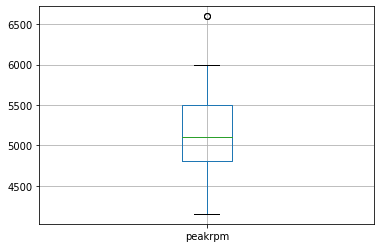

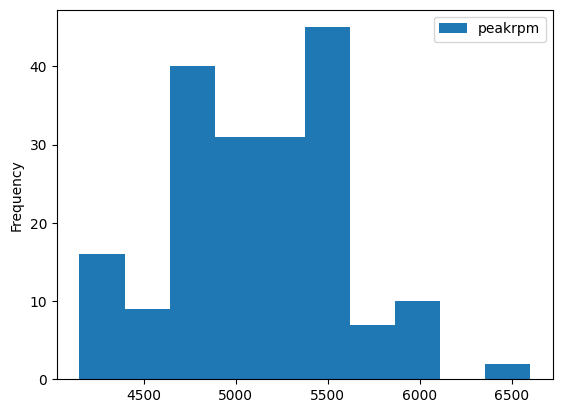

In [11]:
df[['peakrpm']].boxplot()
df[['peakrpm']].plot.hist(bins=10)

<AxesSubplot:ylabel='Frequency'>

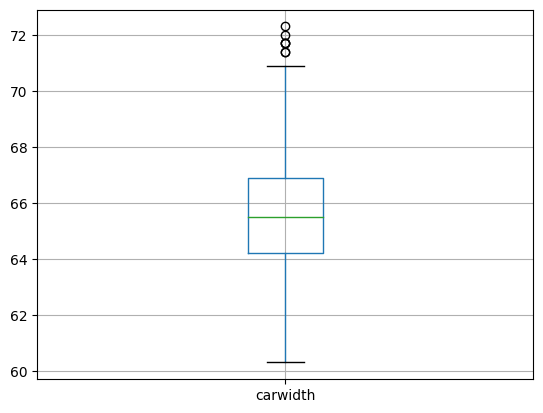

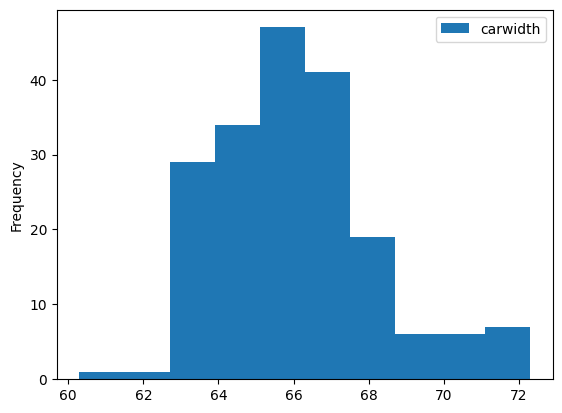

In [12]:
df[['carwidth']].boxplot()
df[['carwidth']].plot.hist(bins=10)

<AxesSubplot:ylabel='Frequency'>

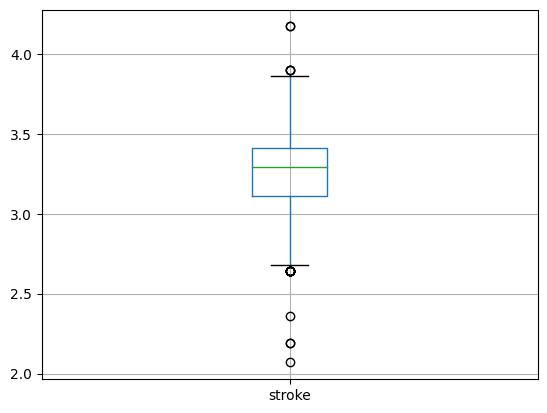

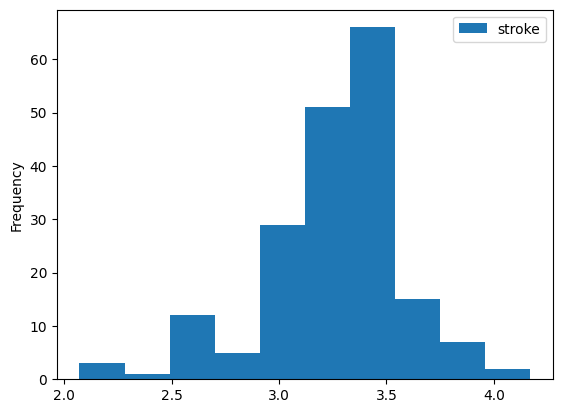

In [13]:
df[['stroke']].boxplot()
df[['stroke']].plot.hist(bins=10)

In [14]:
from sklearn.preprocessing import RobustScaler

rb_scaler = RobustScaler() 

df['peakrpm'],df['carwidth'],df['stroke'] = rb_scaler.fit_transform(df[['peakrpm','carwidth','stroke']]).T

df.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,-0.518519,2548,dohc,four,-2.033333,-0.142857,expensive
2,std,front,0.000000,2823,ohcv,six,0.600000,-0.142857,expensive
3,std,front,0.000000,2337,ohc,four,0.366667,0.571429,expensive
4,std,front,0.333333,2824,ohc,five,0.366667,0.571429,expensive
5,std,front,0.296296,2507,ohc,five,0.366667,0.571429,expensive


### `curbweight`

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ <code>curbweight</code> has a normal distribution and no outliers. It can be Standard Scaled.
</details>

<AxesSubplot:ylabel='Frequency'>

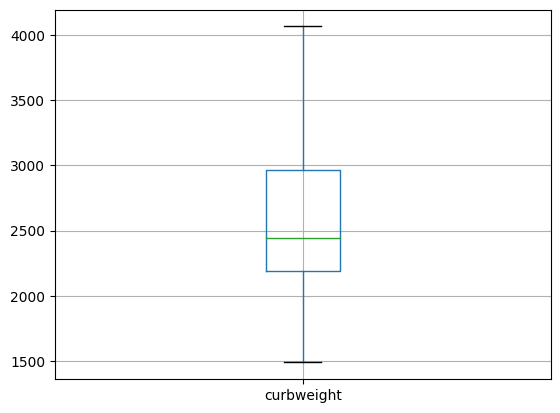

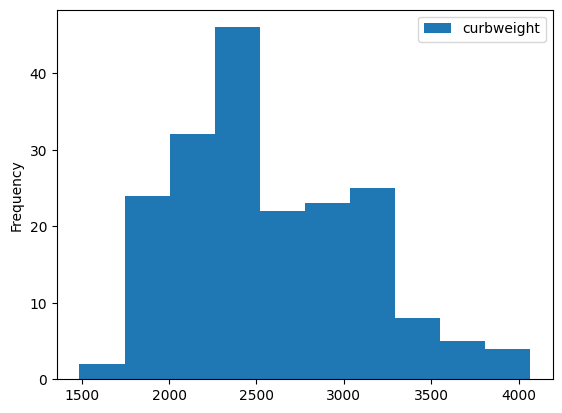

In [15]:
df[['curbweight']].boxplot()
df[['curbweight']].plot.hist(bins=10)

In [16]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

df['curbweight'] = std_scaler.fit_transform(df[['curbweight']])

df.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,-0.518519,-0.048068,dohc,four,-2.033333,-0.142857,expensive
2,std,front,0.000000,0.476395,ohcv,six,0.600000,-0.142857,expensive
3,std,front,0.000000,-0.450474,ohc,four,0.366667,0.571429,expensive
4,std,front,0.333333,0.478302,ohc,five,0.366667,0.571429,expensive
5,std,front,0.296296,-0.126260,ohc,five,0.366667,0.571429,expensive


🧪 **Test your code**

In [17]:
from nbresult import ChallengeResult

result = ChallengeResult('scaling',
                         dataset = df
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.8.10, pytest-7.1.2, pluggy-1.0.0 -- /bin/python3
cachedir: .pytest_cache
rootdir: /home/quantium/labs/lewagon/data-challenges/05-ML/02-Prepare-the-dataset/03-Car-Prices/tests
plugins: dash-1.19.0, anyio-3.6.1
collecting ... collected 4 items

test_scaling.py::TestScaling::test_carwidth PASSED                       [ 25%]
test_scaling.py::TestScaling::test_curbweight PASSED                     [ 50%]
test_scaling.py::TestScaling::test_peakrpm PASSED                        [ 75%]
test_scaling.py::TestScaling::test_stroke PASSED                         [100%]

============================== 4 passed in 0.41s ===============================


💯 You can commit your code:

git add tests/scaling.pickle

git commit -m 'Completed scaling step'

git push origin master



## (4) Encoding the categorical features

❓ **Question: encoding the categorical variables** ❓

👇 Investigate the features that require encoding, and apply the following techniques accordingly:

- One hot encoding
- Manual ordinal encoding

In the dataframe, replace the original features with their encoded version(s).

### `aspiration` & `enginelocation`

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ <code>aspiration</code> and <code>enginelocation</code> are binary categorical features.
</details>

In [18]:
print(df.aspiration.unique()) # Check unique values of `aspiration`

df.enginelocation.unique() # Check unique values of `enginelocation`\

['std' 'turbo']


array(['front', 'rear'], dtype=object)

In [19]:
from sklearn.preprocessing import OneHotEncoder

binary_encoder = OneHotEncoder(sparse=False, drop='if_binary')
df['aspiration'], df['enginelocation'] = binary_encoder.fit_transform(df[['aspiration', 'enginelocation']]).T

df.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,0.0,0.0,-0.518519,-0.048068,dohc,four,-2.033333,-0.142857,expensive
2,0.0,0.0,0.000000,0.476395,ohcv,six,0.600000,-0.142857,expensive
3,0.0,0.0,0.000000,-0.450474,ohc,four,0.366667,0.571429,expensive
4,0.0,0.0,0.333333,0.478302,ohc,five,0.366667,0.571429,expensive
5,0.0,0.0,0.296296,-0.126260,ohc,five,0.366667,0.571429,expensive


### `enginetype`

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ <code>enginetype</code> is a multicategorical feature and must be One hot encoded.
</details>

In [20]:
df.enginetype.unique() # Check unique values of `enginetype`

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [21]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)

enginetype_ohe = ohe.fit_transform(df[['enginetype']])

print(ohe.categories_) # Check the column order returned by the transformation

df['dohc'],df['dohcv'],df['l'],df['ohc'],df['ohcf'],df['ohcv'],df['rotor'] = enginetype_ohe.T

df.drop(columns='enginetype', inplace = True)

df.head()

[array(['dohc', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor'], dtype=object)]


,aspiration,enginelocation,carwidth,curbweight,cylindernumber,stroke,peakrpm,price,dohc,dohcv,l,ohc,ohcf,ohcv,rotor
0,0.0,0.0,-0.518519,-0.048068,four,-2.033333,-0.142857,expensive,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.476395,six,0.600000,-0.142857,expensive,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.000000,-0.450474,four,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.333333,0.478302,five,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.296296,-0.126260,five,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### `cylindernumber`

<details>
    <summary>💡 Hint </summary>

ℹ️ <code>cylindernumber</code> is an ordinal feature and must be manually encoded.

⚖️ Once that it is encoded between 2 and 12, it has become a numerical feature that you can scale.
</details>

In [22]:
df.cylindernumber.unique() # Check unique values 

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [23]:
df['cylindernumber'] = df['cylindernumber'].map({'four': 4,
                                                 'six': 6,
                                                 "five":5,
                                                 'three': 3,
                                                 'twelve':12,
                                                 'two':2,
                                                 'eight':8})
df.head()

,aspiration,enginelocation,carwidth,curbweight,cylindernumber,stroke,peakrpm,price,dohc,dohcv,l,ohc,ohcf,ohcv,rotor
0,0.0,0.0,-0.518519,-0.048068,4,-2.033333,-0.142857,expensive,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.476395,6,0.600000,-0.142857,expensive,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.000000,-0.450474,4,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.333333,0.478302,5,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.296296,-0.126260,5,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [24]:
# Cylinder can now be scaled
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()

df['cylindernumber'] = mm_scaler.fit_transform(df[['cylindernumber']])

df.head()

,aspiration,enginelocation,carwidth,curbweight,cylindernumber,stroke,peakrpm,price,dohc,dohcv,l,ohc,ohcf,ohcv,rotor
0,0.0,0.0,-0.518519,-0.048068,0.2,-2.033333,-0.142857,expensive,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.476395,0.4,0.600000,-0.142857,expensive,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.000000,-0.450474,0.2,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.333333,0.478302,0.3,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.296296,-0.126260,0.3,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### `price`

👇 Encode the target `price`.

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ <code>price</code> is the target and must be Label encoded.
</details>

In [25]:
from sklearn.preprocessing import LabelEncoder

df['price'] = LabelEncoder().fit_transform(df['price'])
df.head()

,aspiration,enginelocation,carwidth,curbweight,cylindernumber,stroke,peakrpm,price,dohc,dohcv,l,ohc,ohcf,ohcv,rotor
0,0.0,0.0,-0.518519,-0.048068,0.2,-2.033333,-0.142857,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.476395,0.4,0.600000,-0.142857,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.000000,-0.450474,0.2,0.366667,0.571429,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.333333,0.478302,0.3,0.366667,0.571429,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.296296,-0.126260,0.3,0.366667,0.571429,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0


🧪 **Test your code**

In [26]:
from nbresult import ChallengeResult

result = ChallengeResult('encoding',
                         dataset = df)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.8.10, pytest-7.1.2, pluggy-1.0.0 -- /bin/python3
cachedir: .pytest_cache
rootdir: /home/quantium/labs/lewagon/data-challenges/05-ML/02-Prepare-the-dataset/03-Car-Prices/tests
plugins: dash-1.19.0, anyio-3.6.1
collecting ... collected 4 items

test_encoding.py::TestEncoding::test_aspiration PASSED                   [ 25%]
test_encoding.py::TestEncoding::test_enginelocation PASSED               [ 50%]
test_encoding.py::TestEncoding::test_enginetype PASSED                   [ 75%]
test_encoding.py::TestEncoding::test_price PASSED                        [100%]

============================== 4 passed in 0.40s ===============================


💯 You can commit your code:

git add tests/encoding.pickle

git commit -m 'Completed encoding step'

git push origin master



## (5) Base Modelling

👏 The dataset has been preprocessed and is now ready to be fitted to a model. 

❓**Question: a first attempt to evaluate a classification model** ❓

Cross-validate a `LogisticRegression` on this preprocessed dataset and save its score under a variable named `base_model_score`.

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

X = df.drop(columns=['price'])
y = df['price']

model = LogisticRegression()

scores = cross_val_score(model, X, y, cv=10)
base_model_score = scores.mean()

base_model_score

0.8744736842105262

🧪 **Test your code**

In [28]:
from nbresult import ChallengeResult

result = ChallengeResult('base_model',
                         score = base_model_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.8.10, pytest-7.1.2, pluggy-1.0.0 -- /bin/python3
cachedir: .pytest_cache
rootdir: /home/quantium/labs/lewagon/data-challenges/05-ML/02-Prepare-the-dataset/03-Car-Prices/tests
plugins: dash-1.19.0, anyio-3.6.1
collecting ... collected 1 item

test_base_model.py::TestBase_model::test_base_model_score PASSED         [100%]

============================== 1 passed in 0.10s ===============================


💯 You can commit your code:

git add tests/base_model.pickle

git commit -m 'Completed base_model step'

git push origin master



## (6) Feature Selection

👩🏻‍🏫 A powerful way to detect whether a feature is relevant or not to predict a target is to:
1. Run a model and score it
2. Shuffle this feature, re-run the model and score it
    - If the performance significantly dropped, the feature is important and you shoudn't have dropped it
    - If the performance didn't decrease a lot, the feature may be discarded.

❓ **Questions** ❓

1. Perform a feature permutation to detect which features bring the least amount of information to the model. 
2. Remove the weak features from your dataset.
3. Using your new set of strong features, cross-validate a new model, and save its score under variable name `strong_model_score`.

In [29]:
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.inspection import permutation_importance

# Evaluate your model without feature permutation
model = LogisticRegression()
cv_results = cross_validate(model, X, y, cv = 5)
score = cv_results["test_score"].mean()
print(f"Before any feature permutation, the cross-validated accuracy is equal to {round(score,2)}")

## Question 1 - Permutation importance
model = LogisticRegression().fit(X,y) # Fit the model 
permutation_score = permutation_importance(model, X, y, n_repeats=100) # Perform Permutation
importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T, # Unstack results
                            columns = ['feature','feature_importance']) 

print("After feature permutation, here are the decreases in terms of scores:")
importance_df = importance_df.sort_values(by="feature_importance", ascending = False) # Order by importance
importance_df

Before any feature permutation, the cross-validated accuracy is equal to 0.86
After feature permutation, here are the decreases in terms of scores:


,feature,feature_importance
3,curbweight,0.302618
2,carwidth,0.104817
5,stroke,0.029948
11,ohcf,0.018691
6,peakrpm,0.010628
10,ohc,0.010576
0,aspiration,0.008691
7,dohc,0.005969
13,rotor,0.005916
12,ohcv,0.001571


In [30]:
## Question 2 - remove weak features

# I want to get rid of features which caused less than this  in terms of performance
threshold = 0.05 

# Decompose this one-liner piece of code step by step if you don't understand it at first sight!
weak_features = importance_df[importance_df.feature_importance <= threshold]["feature"].values
weak_features

array(['stroke', 'ohcf', 'peakrpm', 'ohc', 'aspiration', 'dohc', 'rotor',
       'ohcv', 'cylindernumber', 'enginelocation', 'dohcv', 'l'],
      dtype=object)

In [31]:
## Question 3 - Cross validating the model with strong features only
X_strong_features = df.drop(columns=list(weak_features) + ["price"])

print(f"Our strong features are {list(X_strong_features.columns)}")

model = LogisticRegression()

scores = cross_val_score(model, X_strong_features, y, cv = 5)
strong_model_score = scores.mean()

print(f"Before removing weak features, the cross-validated accuracy was equal to {round(score,2)}")

print(f"The LogisticRegression fitted with the strong features only has a score of {round(strong_model_score,2)}")

#### NOTE - The score may even be better because 
### some features were bringing nothing else than noise to the model

Our strong features are ['carwidth', 'curbweight']
Before removing weak features, the cross-validated accuracy was equal to 0.86
The LogisticRegression fitted with the strong features only has a score of 0.91


🧪 **Test your code**

In [32]:
from nbresult import ChallengeResult

result = ChallengeResult('strong_model',
                         score = strong_model_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.8.10, pytest-7.1.2, pluggy-1.0.0 -- /bin/python3
cachedir: .pytest_cache
rootdir: /home/quantium/labs/lewagon/data-challenges/05-ML/02-Prepare-the-dataset/03-Car-Prices/tests
plugins: dash-1.19.0, anyio-3.6.1
collecting ... collected 1 item

test_strong_model.py::TestStrong_model::test_strong_model_score PASSED   [100%]

============================== 1 passed in 0.10s ===============================


💯 You can commit your code:

git add tests/strong_model.pickle

git commit -m 'Completed strong_model step'

git push origin master



🏁 Congratulations! You have prepared a whole dataset and ran some feature selection on it 💪

💾 Don't forget to git add/commit/push your notebook...

🚀 ... and move on to the next challenge!